In [2]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [3]:
BATCH_SIZE = 32
MAX_EPOCHS = 20

In [4]:
zip_path = tf.keras.utils.get_file(
 origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)

csv_path, _ = os.path.splitext(zip_path)

In [5]:
df = pd.read_csv(csv_path)
df = df[5::6] # make hourly
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [7]:
wv = df['wv (m/s)']
wv_bad = wv == -9999.00
wv[wv_bad] = 0.0

max_wv = df['max. wv (m/s)']
max_wv_bad = max_wv == -9999.00
max_wv[max_wv_bad] = 0.0

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


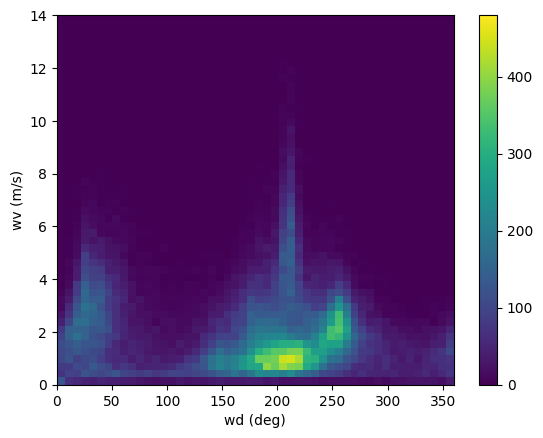

In [8]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=480)
plt.colorbar()
plt.xlabel('wd (deg)')
plt.ylabel('wv (m/s)')
plt.show()

In [9]:
wv = df.pop('wv (m/s)')
wv_max = df.pop('max. wv (m/s)')

wd_rad = df.pop('wd (deg)')*np.pi/180.0

df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

df['max Wx'] = wv*np.cos(wd_rad)
df['max Wy'] = wv*np.sin(wd_rad)

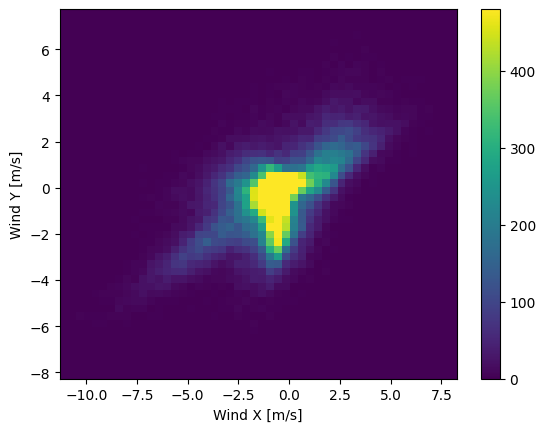

In [10]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=480)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')
plt.show()

In [11]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [12]:
column_indices = {colname:i for i, colname in enumerate(df.columns)}

n = len(df)
train_df_original = df[:int(n*0.7)] # 70% train
val_df_original = df[int(n*0.7):int(n*0.9)] # 20% val
test_df_original = df[int(n*0.9):] # 10% test

num_features = df.shape[1]

print(f'train: {train_df_original.shape}\tval: {val_df_original.shape}\ttest: {test_df_original.shape}')

train: (49063, 19)	val: (14018, 19)	test: (7010, 19)


In [13]:
# normalizing with training set mean and standard deviation. !! this is not 100% clean -> since it's a time series, taking the mean over 
# the entire training dataset brings information from the future (end of the time series) into the past (start of the time series). however,
# because we've already taken away val and test datasets, this is not 'entirely dishonest' ;) 
train_mean = train_df_original.mean(axis=0)
train_sd = train_df_original.std(axis=0)

train_df = (train_df_original - train_mean) / train_sd
val_df = (val_df_original - train_mean) / train_sd
test_df = (test_df_original - train_mean) / train_sd

C:\Users\robet\AppData\Local\Temp\ipykernel_8048\2188831089.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


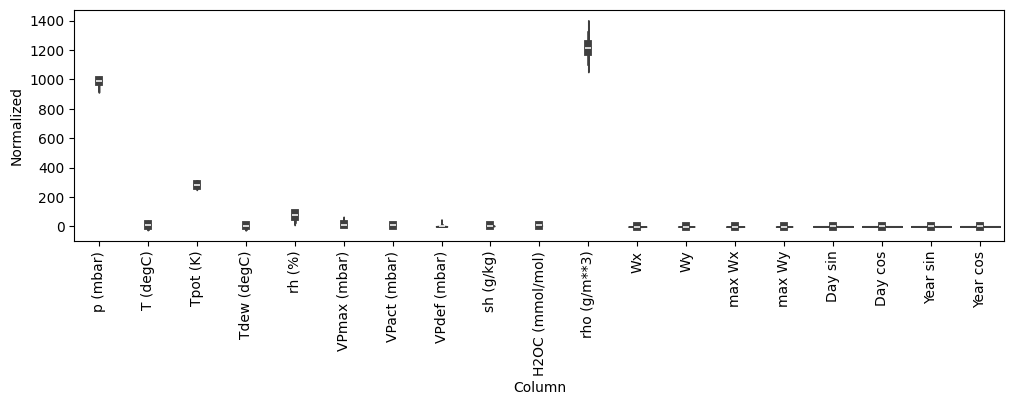

In [190]:
df_melted = df.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 3))
ax = sns.violinplot(x='Column', y='Normalized', data=df_melted)
_ = ax.set_xticklabels(df.keys(), rotation=90)

C:\Users\robet\AppData\Local\Temp\ipykernel_8048\2790111085.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


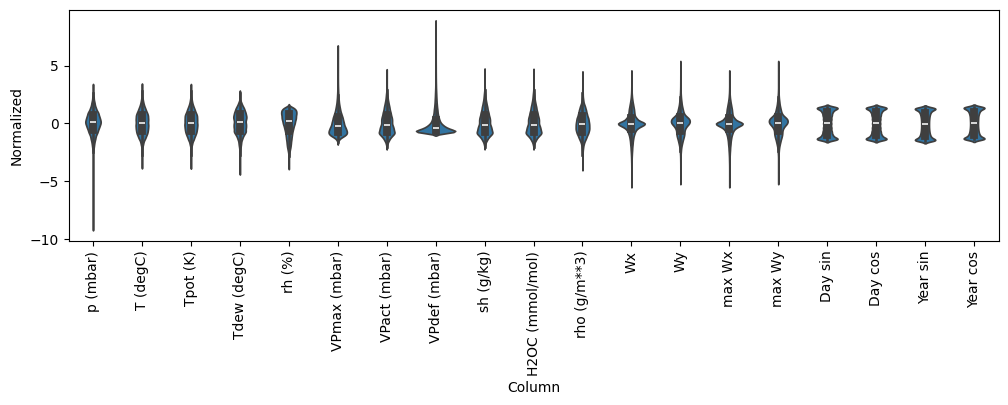

In [191]:
df_normalized = (df - train_mean) / train_sd
df_normalized = df_normalized.melt(var_name='Column', value_name='Normalized')

plt.figure(figsize=(12, 3))
ax = sns.violinplot(x='Column', y='Normalized', data=df_normalized)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [17]:
class WindowGenerator:


    def __init__(self, input_width, label_width, offset, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):

        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        self.input_width = input_width
        self.label_width = label_width
        self.offset = offset

        self.total_window_size = input_width + offset

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.label_slice = slice(self.label_start, None) # None -> slice goes until end of iterable on which it's used
        self.label_indices = np.arange(self.total_window_size)[self.label_slice]


    def __repr__(self):
        return '\n'.join([
            f'Total window size = {self.total_window_size}',
            f'Input indices = {self.input_indices}',
            f'Label indices = {self.label_indices}',
            f'Label columns = {self.label_columns}'
        ])


    def split_window(self, features):
        
        # (1st dimension is batch, 2nd is timestep, 3rd is variable)
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.label_slice, :]
        
        # keep only desired output columns
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1
            )

        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
        return inputs, labels


    def plot(self, model=None, plot_col='T (degC)', max_subplots=3):
        
        inputs, labels = self.example
        
        plt.figure(figsize=(12, 5))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(
                self.input_indices, 
                inputs[n, :, plot_col_index],
                label='Inputs', 
                marker='.', 
                zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(
                self.label_indices, 
                labels[n, :, label_col_index],
                edgecolors='k', 
                label='Labels', 
                c='#2ca02c', 
                s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(
                    self.label_indices, 
                    predictions[n, :, label_col_index],
                    marker='X', 
                    edgecolors='k', 
                    label='Predictions',
                    c='#ff7f0e', 
                    s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')
        plt.tight_layout()


    def make_dataset(self, data):
        data = np.array(data, dtype=float)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=BATCH_SIZE
        )
        ds = ds.map(self.split_window)
        return ds
    

    def make_dataset_no_shuffle(self, data):
        data = np.array(data, dtype=float)
        ds = tf.keras.utils.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=False,
            batch_size=BATCH_SIZE
        )
        ds = ds.map(self.split_window)
        return ds


    @property
    def train_ds(self):
        return self.make_dataset(self.train_df)
    

    @property
    def val_ds(self):
        return self.make_dataset(self.val_df)
    

    @property
    def test_ds(self):
        return self.make_dataset(self.test_df)
    

    @property
    def test_ds_no_shuffle(self):
        return self.make_dataset_no_shuffle(self.test_df)


    @property
    def example(self):
        return next(iter(self.test_ds))

In [18]:
w = WindowGenerator(input_width=24*10, label_width=24, offset=24, label_columns=['T (degC)'])

example_window = tf.stack(
    [np.array(train_df[:w.total_window_size]),
    np.array(train_df[10:10 + w.total_window_size]),
    np.array(train_df[20:20 + w.total_window_size])
])

example_inputs, example_labels = w.split_window(example_window)

print(example_inputs.shape)
print(example_labels.shape)

(3, 240, 19)
(3, 24, 1)


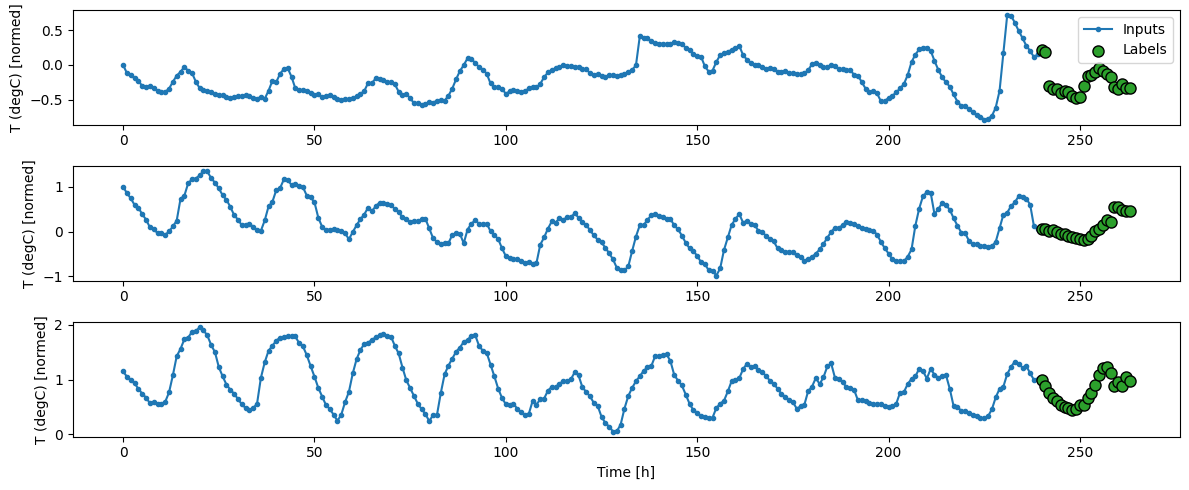

In [19]:
w.plot()

In [31]:
inputs, targets = next(iter(w.train_ds.take(1)))
print(f'input shape = {inputs.shape}')
print(f'target shape = {targets.shape}')

input shape = (32, 240, 19)
target shape = (32, 24, 1)


### **Compare multiple models**

In [35]:
n_param = dict()
val_performance = {}
performance = {}


def compile_and_fit(model, window, patience=2):
    
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min'
    )

    model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.MeanAbsoluteError()]
    )

    model(window.example[0]) # build model to get number of parameters
    
    n_param = model.count_params()
    print(f'\nEstimating {n_param:,} parameters on {window.train_df.shape[0]:,} datapoints\n')

    history = model.fit(
        window.train_ds,
        validation_data=window.val_ds,
        epochs=MAX_EPOCHS,
        callbacks=[early_stopping]
    )

    return history, n_param

##### **Single-step single-output model - naïve baseline $x(t) = x(t-1)$**

(32, 24, 19)
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0142 - mean_absolute_error: 0.0856
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0129 - mean_absolute_error: 0.0786


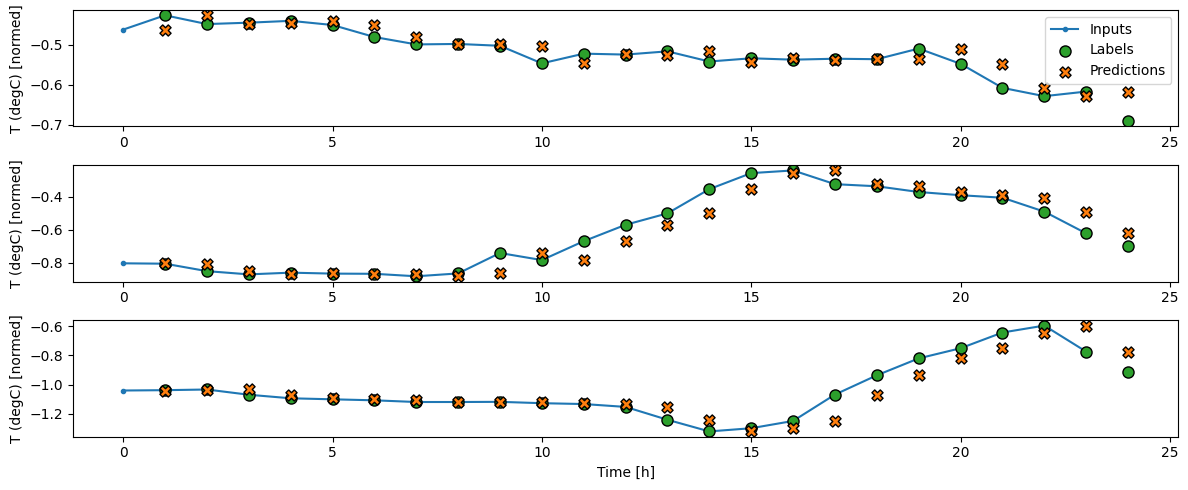

In [36]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index] # this returns a 2d tensor because we're selecting all batches and timesteps of one feature
        return result[:, :, tf.newaxis] # this restores the 3d shape by adding a singleton dimension as the last axis


baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

w_wide = WindowGenerator(input_width=24, label_width=24, offset=1, label_columns=['T (degC)'])

print(w_wide.example[0].shape)

performance['Baseline'] = baseline.evaluate(w_wide.test_ds, return_dict=True)
val_performance['Baseline'] = baseline.evaluate(w_wide.val_ds, return_dict=True)
n_param['baseline'] = 0

w_wide.plot(baseline)

##### **Single-step single-output model - linear, single-lag $x(t) = f(x(t-1))$**

For this model, we'll generate windows of data with shape (`BATCH_SIZE`, `n_timesteps`, `n_features`), where X (inputs) and y (labels) will have the same number of timesteps. The model infers the input_shape from the batches provided by the generator.

In [37]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

w_wide = WindowGenerator(input_width=24, label_width=24, offset=1, label_columns=['T (degC)'])

print(f'input shape = {w_wide.example[0].shape}')
print(f'output shape = {linear(w_wide.example[0]).shape}')

input shape = (32, 24, 19)
output shape = (32, 24, 1)


In [38]:
history, n_param_linear = compile_and_fit(linear, w_wide)
n_param['linear'] = n_param_linear


Estimating 20 parameters on 49,063 datapoints

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0999 - mean_absolute_error: 0.2163 - val_loss: 0.0093 - val_mean_absolute_error: 0.0715
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0095 - mean_absolute_error: 0.0715 - val_loss: 0.0092 - val_mean_absolute_error: 0.0708
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0093 - mean_absolute_error: 0.0708 - val_loss: 0.0089 - val_mean_absolute_error: 0.0696
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0091 - mean_absolute_error: 0.0699 - val_loss: 0.0088 - val_mean_absolute_error: 0.0691
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0090 - mean_absolute_error: 0.0693 - val_loss: 0.0087 - val_mean_absolute_error: 0.0683
Epoch 6/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0089 - mean_absolute_error: 0.0690 - val_loss: 0.0086 - val_mean_absolute_error: 0.0680
Epoch 7/20
1533/1533 ━━━━━━━━━━━━━━━━━━━

In [39]:
val_performance['Linear'] = linear.evaluate(w_wide.val_ds, return_dict=True)
performance['Linear'] = linear.evaluate(w_wide.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0086 - mean_absolute_error: 0.0679
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0083 - mean_absolute_error: 0.0661


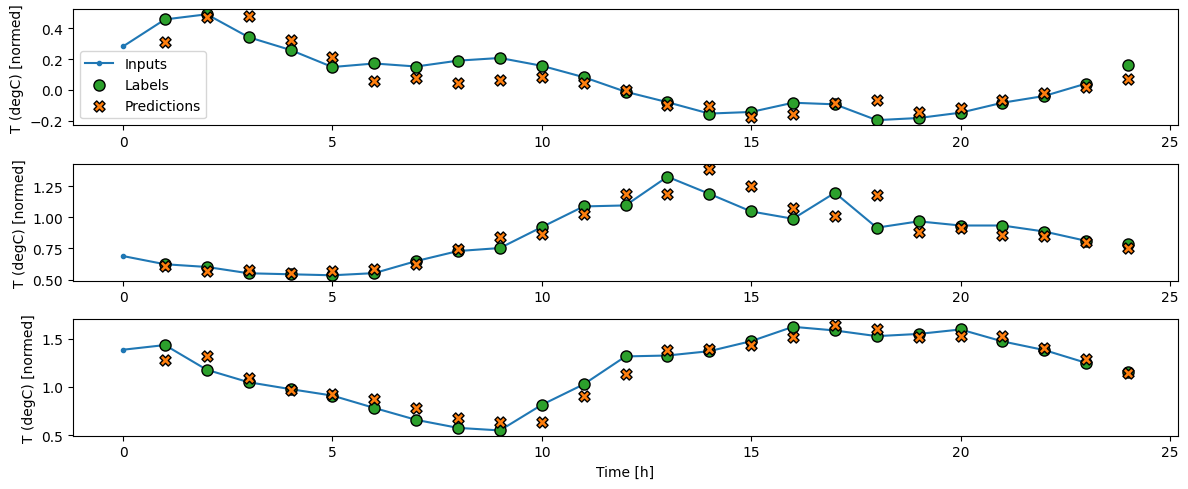

In [40]:
w_wide.plot(linear)

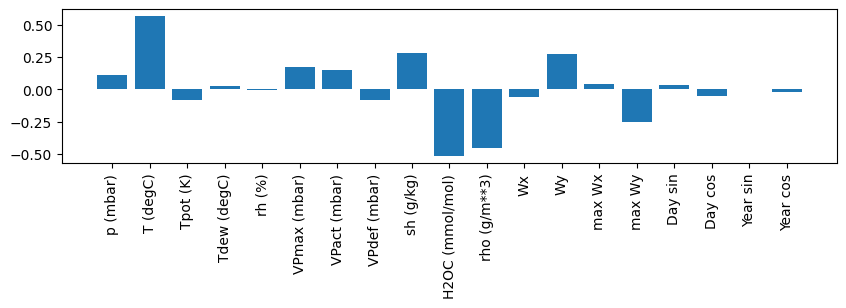

In [41]:
weights = linear.layers[0].kernel[:, 0].numpy()
fig, ax = plt.subplots(figsize=(10, 2))
ax.bar(x=range(len(train_df.columns)), height= weights)
ax.set_xticks(range(len(train_df.columns)))
ax.set_xticklabels(train_df.columns, rotation=90)
plt.show()

##### **Single-step single-output model - dense, single-lag $x(t) = f(x(t-1))$**

In [42]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

w_wide = WindowGenerator(input_width=24, label_width=24, offset=1, label_columns=['T (degC)'])

print(f'input shape = {w_wide.example[0].shape}')
print(f'output shape = {dense(w_wide.example[0]).shape}')
print(f'output data shape = {w_wide.example[1].shape}')

input shape = (32, 24, 19)
output shape = (32, 24, 1)
output data shape = (32, 24, 1)


In [43]:
history, n_param_dense = compile_and_fit(dense, w_wide)
n_param['dense'] = n_param_dense


Estimating 5,505 parameters on 49,063 datapoints

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.0366 - mean_absolute_error: 0.1018 - val_loss: 0.0070 - val_mean_absolute_error: 0.0596
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0066 - mean_absolute_error: 0.0578 - val_loss: 0.0068 - val_mean_absolute_error: 0.0593
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0063 - mean_absolute_error: 0.0560 - val_loss: 0.0068 - val_mean_absolute_error: 0.0581
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0553 - val_loss: 0.0067 - val_mean_absolute_error: 0.0588
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0547 - val_loss: 0.0065 - val_mean_absolute_error: 0.0566
Epoch 6/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0543 - val_loss: 0.0064 - val_mean_absolute_error: 0.0565
Epoch 7/20
1533/1533 ━━━━━━━━━━━━━

In [44]:
val_performance['Dense'] = dense.evaluate(w_wide.val_ds, return_dict=True)
performance['Dense'] = dense.evaluate(w_wide.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0597
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0609


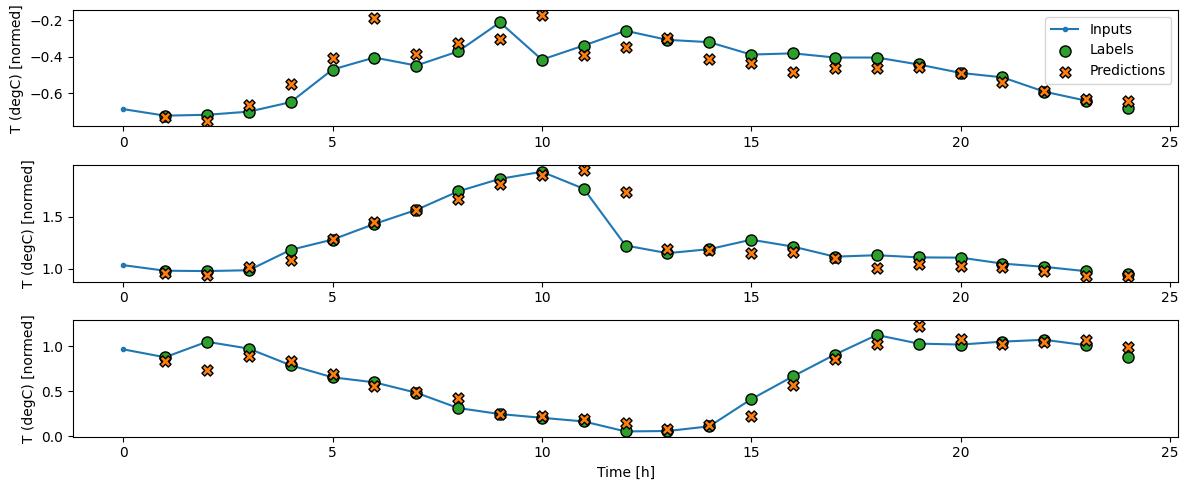

In [45]:
w_wide.plot(dense)

##### **Single-step single-output model - dense, multi-lag $x(t) = f(x(t-1), x(t-2), ... x(t-h))$**

One approach to provide a multi-lag input to a dense model is to flatten the inputs, which makes $x(t)$ a function of the lagged values of all features. Obviously, this model can only be called on windows of the exact same shape it was created with.

In [46]:
dense_multilag = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, -1])
])

w_sequence = WindowGenerator(input_width=12, label_width=1, offset=1, label_columns=['T (degC)'])


print(f'input shape = {w_sequence.example[0].shape}')
print(f'output shape = {dense_multilag(w_sequence.example[0]).shape}')
print(f'output data shape = {w_sequence.example[1].shape}')
try:
    print(f'output shape, different input = {dense_multilag(w_wide.example[0]).shape}')
except Exception as e:
    print(f'\n{type(e).__name__}: {e}')

input shape = (32, 12, 19)
output shape = (32, 1, 1)
output data shape = (32, 1, 1)

ValueError: Exception encountered when calling Sequential.call().

Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 228, but received input with shape (32, 456)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 24, 19), dtype=float32)
  • training=None
  • mask=None


In [47]:
history, n_param_dense_multilag = compile_and_fit(dense_multilag, w_sequence)
n_param['dense_multilag'] = n_param_dense_multilag


Estimating 8,417 parameters on 49,063 datapoints

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.0667 - mean_absolute_error: 0.1735 - val_loss: 0.0109 - val_mean_absolute_error: 0.0784
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0103 - mean_absolute_error: 0.0760 - val_loss: 0.0078 - val_mean_absolute_error: 0.0635
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0088 - mean_absolute_error: 0.0688 - val_loss: 0.0072 - val_mean_absolute_error: 0.0607
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0079 - mean_absolute_error: 0.0649 - val_loss: 0.0079 - val_mean_absolute_error: 0.0652
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0077 - mean_absolute_error: 0.0639 - val_loss: 0.0081 - val_mean_absolute_error: 0.0645


In [48]:
val_performance['Dense multi-lag'] = dense_multilag.evaluate(w_sequence.val_ds, return_dict=True)
performance['Dense multi-lag'] = dense_multilag.evaluate(w_sequence.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0079 - mean_absolute_error: 0.0641
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0081 - mean_absolute_error: 0.0658


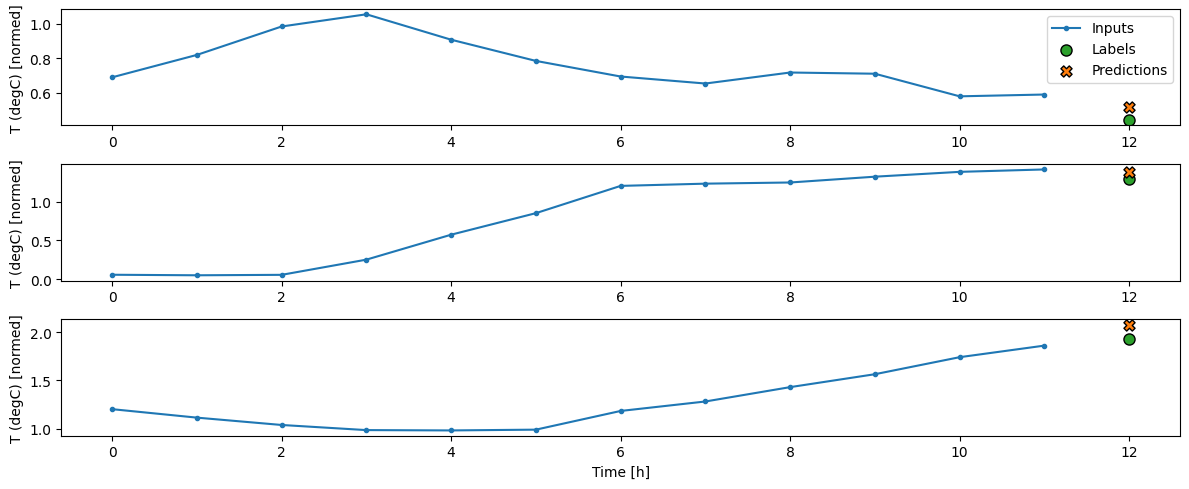

In [49]:
w_sequence.plot(dense_multilag)

Convolutional networks don't have the above problem regarding their input shape

##### **Single-step single-output model - convolutional 1d, multi-lag $x(t) = f(x(t-1), x(t-2), ... x(t-h))$**

In [50]:
CONV_WIDTH = 12
LABEL_WIDTH = 1
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1) # because the conv. kernel leads to shorter output (exactly how much shorter depends on padding type)

conv = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=5, kernel_size=(CONV_WIDTH,), activation='relu'),
    tf.keras.layers.Dense(units=1),
])

w_conv = WindowGenerator(input_width=INPUT_WIDTH, label_width=LABEL_WIDTH, offset=1, label_columns=['T (degC)'])

print(f'input shape = {w_conv.example[0].shape}')
print(f'output shape = {conv(w_conv.example[0]).shape}')
print(f'output data shape = {w_conv.example[1].shape}')
try:
    print(f'output shape, different input = {conv(w_wide.example[0]).shape}')
except Exception as e:
    print(f'\n{type(e).__name__}: {e}')


input shape = (32, 12, 19)
output shape = (32, 1, 1)
output data shape = (32, 1, 1)
output shape, different input = (32, 13, 1)


In [51]:
history, n_param_conv = compile_and_fit(conv, w_conv)
n_param['conv1d'] = n_param_conv


Estimating 1,151 parameters on 49,063 datapoints

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - loss: 0.1149 - mean_absolute_error: 0.2042 - val_loss: 0.0111 - val_mean_absolute_error: 0.0785
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0107 - mean_absolute_error: 0.0761 - val_loss: 0.0085 - val_mean_absolute_error: 0.0661
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0701 - val_loss: 0.0083 - val_mean_absolute_error: 0.0653
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0673 - val_loss: 0.0077 - val_mean_absolute_error: 0.0616
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0082 - mean_absolute_error: 0.0653 - val_loss: 0.0077 - val_mean_absolute_error: 0.0632
Epoch 6/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0080 - mean_absolute_error: 0.0642 - val_loss: 0.0073 - val_mean_absolute_error: 0.0612
Epoch 7/20
1533/1533 ━━━━━━━━━

In [52]:
val_performance['Conv1D multi-step'] = conv.evaluate(w_conv.val_ds, return_dict=True)
performance['Conv1D multi-step'] = conv.evaluate(w_conv.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0067 - mean_absolute_error: 0.0583
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0590


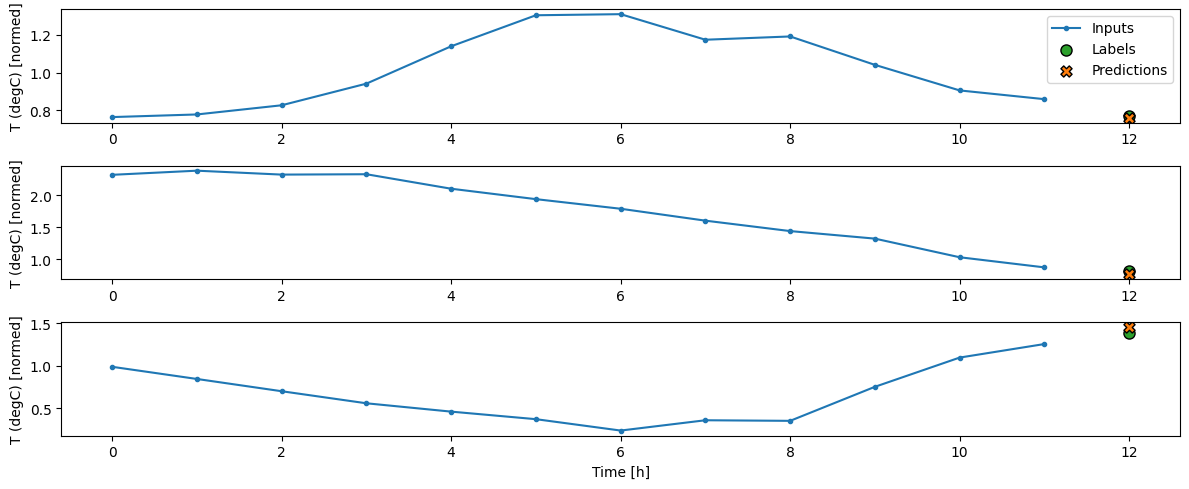

In [53]:
w_conv.plot(conv, plot_col='T (degC)')

##### **Single-step single-output model - LSTM**

This model is a recursive network; it takes multiple timesteps as input and predicts one or several timesteps in the future (only one in this case, as multi-step models are shown in the next section). For a vanilla RNN (Recursive Neural Network), the equation is:

- $h_t = \sigma(W_{xh}x_t + W_{hh}h_{t-1} + b_h)$

- $y_t = W_{hy}h_t + b_y$

For an LSTM (Long short-term memory) network, the equations are:

- Input gate: $i_t = \sigma(W_{xi}x_t + W_{hi}h_{t-1} + b_i)$

- Forget gate: $f_t = \sigma(W_{xf}x_t + W_{hf}h_{t-1} + b_f)$

- Output gate: $o_t = \sigma(W_{xo}x_t + W_{ho}h_{t-1} + b_o)$

- Candidate cell state: $\tilde{c_t} = tanh(W_{xc}x_t + W_{hc}h_{t-1} + b_c)$

- Cell state update: $c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c_t}$

- Hidden state: $h_t = o_t \odot tanh(c_t)$

- Output: $y_t = W_{hy}h_t + b_y$

(Note: $\odot$ = element-wise product)


In [54]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=10, return_sequences=False),
    tf.keras.layers.Dense(units=1),
    tf.keras.layers.Reshape([1, -1])
])

w_lstm = WindowGenerator(input_width=12, label_width=1, offset=1, label_columns=['T (degC)'])

print(f'input shape = {w_lstm.example[0].shape}')
print(f'output shape = {lstm(w_lstm.example[0]).shape}')
print(f'output data shape = {w_lstm.example[1].shape}')

input shape = (32, 12, 19)
output shape = (32, 1, 1)
output data shape = (32, 1, 1)


In [55]:
history, n_param_lstm = compile_and_fit(lstm, w_lstm)
n_param['lstm'] = n_param_lstm


Estimating 1,211 parameters on 49,063 datapoints

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.1452 - mean_absolute_error: 0.2266 - val_loss: 0.0100 - val_mean_absolute_error: 0.0735
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.0094 - mean_absolute_error: 0.0701 - val_loss: 0.0070 - val_mean_absolute_error: 0.0598
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.0073 - mean_absolute_error: 0.0604 - val_loss: 0.0064 - val_mean_absolute_error: 0.0557
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - loss: 0.0068 - mean_absolute_error: 0.0575 - val_loss: 0.0061 - val_mean_absolute_error: 0.0545
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0066 - mean_absolute_error: 0.0562 - val_loss: 0.0061 - val_mean_absolute_error: 0.0541
Epoch 6/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0065 - mean_absolute_error: 0.0558 - val_loss: 0.0060 - val_mean_absolute_error: 0.0537
Epoch 7/20
1533/1533 ━━━━

In [56]:
val_performance['LSTM'] = lstm.evaluate(w_lstm.val_ds, return_dict=True)
performance['LSTM'] = lstm.evaluate(w_lstm.test_ds, return_dict=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0520
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0063 - mean_absolute_error: 0.0532


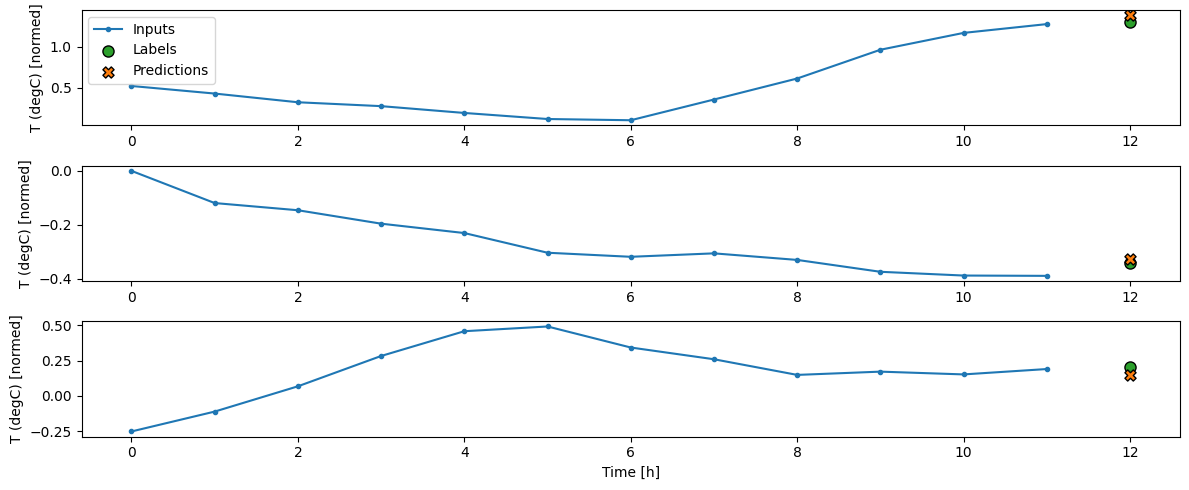

In [57]:
w_lstm.plot(lstm, plot_col='T (degC)')

In [58]:
def make_ypred(model, w, train_mean, train_sd):
    ypred_scaled = model.predict(w.test_ds_no_shuffle)
    ypred = ypred_scaled*train_sd + train_mean
    ypred = tf.squeeze(ypred, axis=-1).numpy()
    reconstructed = np.full((len(w.test_df),), np.nan)
    start_index = w.input_width
    for i, prediction in enumerate(ypred):
        reconstructed[start_index + i] = prediction[0]

    return reconstructed


ypred_baseline = make_ypred(baseline, w_wide, train_mean['T (degC)'], train_sd['T (degC)'])
ypred_linear = make_ypred(linear, w_wide, train_mean['T (degC)'], train_sd['T (degC)'])
ypred_dense = make_ypred(dense, w_wide, train_mean['T (degC)'], train_sd['T (degC)'])
ypred_dense_multilag = make_ypred(dense_multilag, w_sequence, train_mean['T (degC)'], train_sd['T (degC)'])
ypred_conv = make_ypred(conv, w_conv, train_mean['T (degC)'], train_sd['T (degC)'])
ypred_lstm = make_ypred(lstm, w_lstm, train_mean['T (degC)'], train_sd['T (degC)'])

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


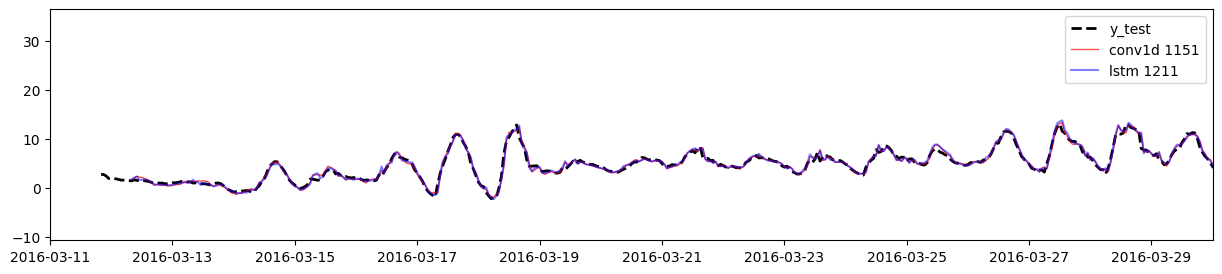

In [59]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(date_time[int(n*0.9):], test_df_original['T (degC)'], linestyle='--', linewidth=2, color='black', label='y_test')
ax.plot(date_time[int(n*0.9):], ypred_conv, linewidth=1, color='red', alpha=0.7, label=f'conv1d {n_param["conv1d"]}')
ax.plot(date_time[int(n*0.9):], ypred_lstm, color='blue', alpha=0.5, label=f'lstm {n_param['lstm']}')
ax.set_xlim(datetime(year=2016, month=3, day=11), datetime(year=2016, month=3, day=30))
ax.legend()
plt.show()

In [60]:
err_conv = ypred_conv - test_df_original['T (degC)']
err_lstm = ypred_lstm - test_df_original['T (degC)']
err_baseline = ypred_baseline - test_df_original['T (degC)']
err_linear = ypred_linear - test_df_original['T (degC)']
err_dense = ypred_dense - test_df_original['T (degC)']
err_dense_multistep = ypred_dense_multilag - test_df_original['T (degC)']

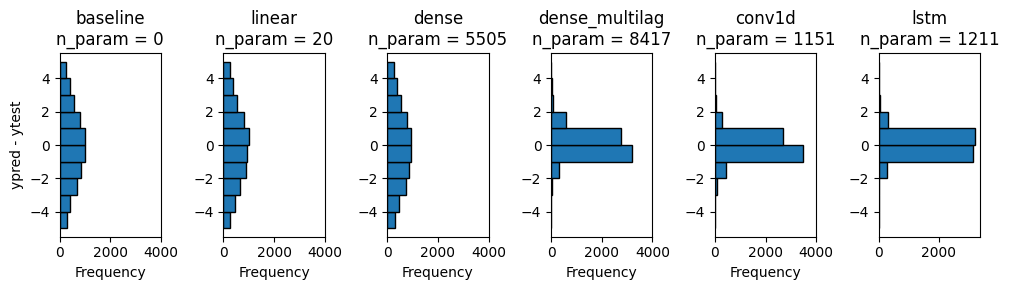

In [61]:
bins = np.arange(-5, 6, 1)

fig, ax = plt.subplots(1, 6, figsize=(10, 3))
ax[0].hist(err_baseline, bins=bins, orientation='horizontal', edgecolor='black')
ax[1].hist(err_linear, bins=bins, orientation='horizontal', edgecolor='black')
ax[2].hist(err_dense, bins=bins, orientation='horizontal',edgecolor='black')
ax[3].hist(err_dense_multistep, bins=bins, orientation='horizontal',edgecolor='black')
ax[4].hist(err_conv, bins=bins, orientation='horizontal', edgecolor='black')
ax[5].hist(err_lstm, bins=bins, orientation='horizontal',edgecolor='black')
for i, title in enumerate(['baseline', 'linear', 'dense', 'dense_multilag', 'conv1d', 'lstm']):
    ax[i].set_title(f'{title}\nn_param = {n_param[title]}')
for i in range(5): 
    ax[i].set_xlim(0, 4000)
    ax[i].set_xlabel('Frequency')
ax[0].set_ylabel('ypred - ytest')
plt.tight_layout()
plt.show()

##### **Multi-step single-output single-shot model - using 1 h to forecast the next 24**

Single-shot models predict all future timesteps at once. In contrast, autoregressive predictions are based on single-step predictions that are fed back into the model as input until the desired prediction sequece length is completed (not shown here).

Here's a single-shot model that uses a single input timestep to predict the next 24 steps (which is way too optimistic):

In [97]:
OUTPUT_STEPS = 24
INPUT_STEPS = 5*24

w_multistep = WindowGenerator(input_width=INPUT_STEPS, label_width=OUTPUT_STEPS, label_columns=['T (degC)'], offset=OUTPUT_STEPS)

dense_multistep = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: x[:, -1, :]), # takes last timestep -> (batch_size, timesteps, features) -> (BATCH_SIZE, 1, features)
    tf.keras.layers.Dense(OUTPUT_STEPS, kernel_initializer=tf._initializers.zeros()), # out shape -> (OUTPUT_STEPS, OUTPUT_STEPS)
    tf.keras.layers.Reshape([-1, 1]) # reshape to match label shape: (BATCH_SIZE, OUTPUT_STEPS, 1)
])

print(f'input shape = {w_multistep.example[0].shape}')
print(f'output shape = {dense_multistep(w_multistep.example[0]).shape}')
print(f'output data shape = {w_multistep.example[1].shape}')

input shape = (32, 120, 19)
output shape = (32, 24, 1)
output data shape = (32, 24, 1)


In [95]:
history, n_param_dense_multistep = compile_and_fit(dense_multistep, w_multistep)
n_param['dense_multistep'] = n_param_dense_multistep


Estimating 480 parameters on 49,063 datapoints

Epoch 1/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.2448 - mean_absolute_error: 0.3555 - val_loss: 0.1070 - val_mean_absolute_error: 0.2491
Epoch 2/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1114 - mean_absolute_error: 0.2557 - val_loss: 0.1070 - val_mean_absolute_error: 0.2492
Epoch 3/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.1102 - mean_absolute_error: 0.2542 - val_loss: 0.1071 - val_mean_absolute_error: 0.2492
Epoch 4/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1102 - mean_absolute_error: 0.2542 - val_loss: 0.1070 - val_mean_absolute_error: 0.2490
Epoch 5/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1102 - mean_absolute_error: 0.2542 - val_loss: 0.1072 - val_mean_absolute_error: 0.2493
Epoch 6/20
1533/1533 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1102 - mean_absolute_error: 0.2541 - val_loss: 0.1069 - val_mean_absolute_error: 0.2490
Epoch 7/20
1533/1533 ━━━━━━━━━━━━━━━━━━

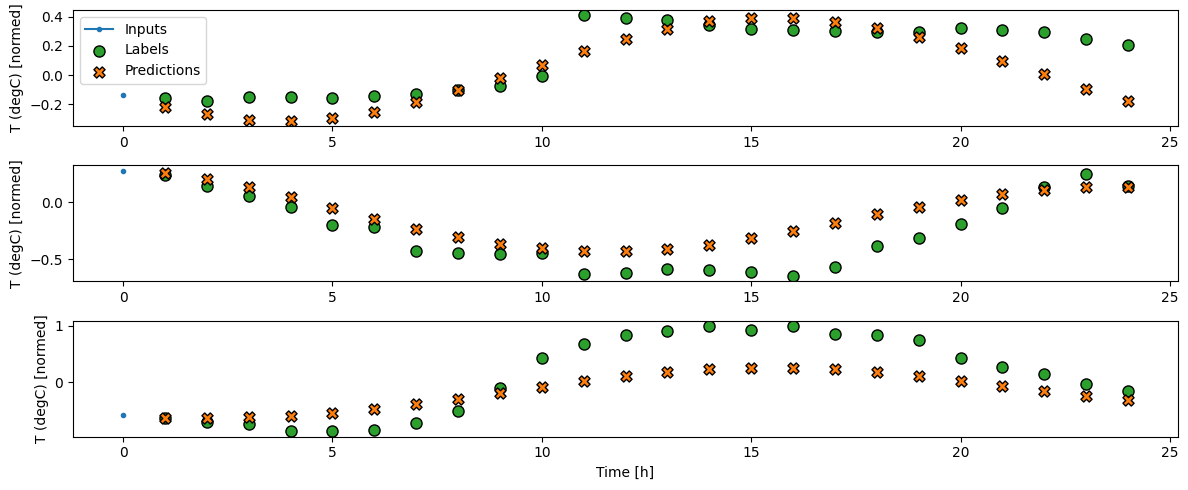

In [96]:
w_multistep.plot(dense_multistep)

##### **Multi-step single-output single-shot model - conv1d**

In [124]:
CONV_WIDTH = 2*24
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1) # because the conv. kernel leads to shorter output (exactly how much shorter depends on padding type)

w_multistep_conv = WindowGenerator(input_width=CONV_WIDTH, label_width=OUTPUT_STEPS, label_columns=['T (degC)'], offset=OUTPUT_STEPS)

conv_multistep = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=10, kernel_size=(CONV_WIDTH, ), activation='relu'), # out shape -> (BATCH_SIZE, 1, kernel_size)
    tf.keras.layers.Dense(OUTPUT_STEPS, kernel_initializer=tf._initializers.zeros()), # out shape -> (BATCH_SIZE, 1, OUTPUT_STEPS)
    tf.keras.layers.Reshape([-1, 1]) # reshape to match label shape: (BATCH_SIZE, OUTPUT_STEPS, 1)
])

print(f'input shape = {w_multistep_conv.example[0].shape}')
print(f'output shape = {conv_multistep(w_multistep_conv.example[0]).shape}')
print(f'output data shape = {w_multistep_conv.example[1].shape}')

input shape = (32, 48, 19)
output shape = (32, 24, 1)
output data shape = (32, 24, 1)


In [125]:
history, n_param_conv_multistep = compile_and_fit(conv_multistep, w_multistep_conv)
n_param['conv_multistep'] = n_param_conv_multistep


Estimating 9,394 parameters on 49,063 datapoints

Epoch 1/20
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.1656 - mean_absolute_error: 0.2976 - val_loss: 0.0894 - val_mean_absolute_error: 0.2311
Epoch 2/20
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0856 - mean_absolute_error: 0.2252 - val_loss: 0.0906 - val_mean_absolute_error: 0.2317
Epoch 3/20
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0834 - mean_absolute_error: 0.2217 - val_loss: 0.0881 - val_mean_absolute_error: 0.2272
Epoch 4/20
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0821 - mean_absolute_error: 0.2197 - val_loss: 0.0867 - val_mean_absolute_error: 0.2247
Epoch 5/20
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - loss: 0.0807 - mean_absolute_error: 0.2175 - val_loss: 0.0857 - val_mean_absolute_error: 0.2228
Epoch 6/20
1531/1531 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0798 - mean_absolute_error: 0.2163 - val_loss: 0.0858 - val_mean_absolute_error: 0.2236
Epoch 7/20
1531/1531 ━━━━━━━━━━

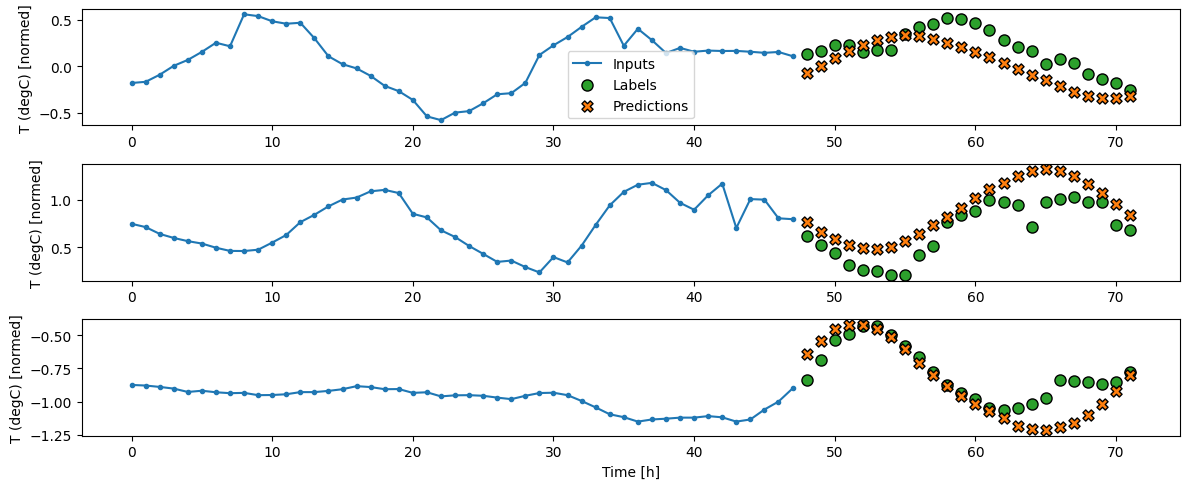

In [126]:
w_multistep_conv.plot(conv_multistep)